In [1]:
import pandas as pd
import numpy as np
from datascience import *
from datascience import Table
import matplotlib
from ipywidgets import interact, Dropdown


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Covid-19

## The Data Science Life Cycle - Table of Contents

<a href='#section 0'>Background Knowledge: Spread of Disease</a>

<a href='#subsection 1a'>Formulating a question or problem</a> 

<a href='#subsection 1b'>Acquiring and preparing data</a>

<a href='#subsection 1c'>Conducting exploratory data analysis</a>

<a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

## Background<a id='section 0'></a>


In March 2020, our lives were turned upside down as the COVID-19 virus spread throughout the United States.  The Centers for Disease Control (CDC) collects data to help health scientists better understand how disease spreads.

Making comparisons between counties and states can us understand how rapidly a virus spreads, the impact of restrictions on public gatherings on the spread of a virus, and measure the changes in fatality as the medical profession learns how to treat the virus and as people get vaccinated. 

## Formulating a question or problem <a id='subsection 1a'></a>

It is important to ask questions that will be informative and that will avoid misleading results. There are many different questions we could ask about Covid-19, for example, many researchers use data to predict the outcomes based on intervention techniques such as social distancing.

<div class="alert alert-info">
<b>Question:</b> Take some time to formulate questions you have about this pandemic and the data you would need to answer the questions. In addition, add the link of an article you found interesting with a description an why it interested you. 
   </div>

**Your questions:** *here*

**Data you would need:** *here*


**Article:** *link*

## Acquiring and preparing data <a id='subsection 1b'></a>

You will be looking at data from the COVID-19 Data Repository at Johns Hopkins University. You can find the raw data [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). 

You will be investigating the cumulative number of cases, new cases, and fatalities in a month for counties in states accross the US, from March 2020 to May 2021.

The following table, `covid_data`, contains the data collected for each month from March 2020 through May 2021 for every county in the United States.

In [14]:
covid_data = Table().read_table("data/covid_timeseries.csv")

Here are some of the important fields in our data set that you will focus on:

|Variable Name   | Description |
|:---|:---|
|Admin2 | County name |
|Province_State | State name |
|month| Reporting month represented as the last day of the month, e.g., 3.31.20 |
|total_cases | Cumulative number of COVID cases |
|month_cases| New cases reported in the month |
|total_fatalities | Cumulative number of fatal COVID cases |
|month_fatalities| New fatal cases reported in the month |
|Population | Population in the county |

Let's take a look at the data.

In [3]:
# Run this cell show the first ten rows of the data
covid_data.show(10)

iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,month,cases,cases_new,Population,fatalities,fatalities_new
USA,1001,Autauga,Alabama,US,32.5395,-86.6441,"Autauga, Alabama, US",3/20,8,8,55869,0,0
USA,1003,Baldwin,Alabama,US,30.7277,-87.7221,"Baldwin, Alabama, US",3/20,23,23,223234,1,1
USA,1005,Barbour,Alabama,US,31.8683,-85.3871,"Barbour, Alabama, US",3/20,0,0,24686,0,0
USA,1007,Bibb,Alabama,US,32.9964,-87.1251,"Bibb, Alabama, US",3/20,3,3,22394,0,0
USA,1009,Blount,Alabama,US,33.9821,-86.5679,"Blount, Alabama, US",3/20,7,7,57826,0,0
USA,1011,Bullock,Alabama,US,32.1003,-85.7127,"Bullock, Alabama, US",3/20,2,2,10101,0,0
USA,1013,Butler,Alabama,US,31.753,-86.6806,"Butler, Alabama, US",3/20,1,1,19448,0,0
USA,1015,Calhoun,Alabama,US,33.7748,-85.8263,"Calhoun, Alabama, US",3/20,10,10,113605,0,0
USA,1017,Chambers,Alabama,US,32.9136,-85.3907,"Chambers, Alabama, US",3/20,40,40,33254,4,4
USA,1019,Cherokee,Alabama,US,34.1781,-85.6064,"Cherokee, Alabama, US",3/20,1,1,26196,0,0


<div class="alert alert-info">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? 
</div>

In [18]:
total_rows = covid_data.num_rows
total_rows

48570

**Your answer here:**

<div class="alert alert-info">
<b>Question:</b> What does each row represent?
   </div>    

*Insert answer here*

<div class="alert alert-info">
<b>Question:</b> This table has many columns that are not particularly informative for our investigation. Which ones can we ignore? Which ones do we need to keep for our analysis?  
</div>

**Your answer here:**

Before we eliminate these columns, let's take a look at some of them to confirm that we don't need them.

It looks like `iso3` has only the value "USA" and that `Country_Region` is always "US". Let's check that this is the case by grouping on each of these columns.

In [4]:
covid_data.group('iso3')

iso3,count
ASM,15
GUM,15
MNP,15
PRI,1170
USA,47340
VIR,15


In [5]:
covid_data.group('Country_Region')

Country_Region,count
US,48570


<div class="alert alert-info">
<b>Question:</b> What did you learn? 
Try searching on the Internet to find out about these iso3 codes. 
What are they?
   </div> 

**Your answer here:**

We are primarily interested in the COVID cases in the states. 
Selected the rows that correspond to states.

In [12]:
covid_us = covid_data.where('iso3','USA')
covid_us.show(10)


iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,month,cases,cases_new,Population,fatalities,fatalities_new
USA,1001,Autauga,Alabama,US,32.5395,-86.6441,"Autauga, Alabama, US",3/20,8,8,55869,0,0
USA,1003,Baldwin,Alabama,US,30.7277,-87.7221,"Baldwin, Alabama, US",3/20,23,23,223234,1,1
USA,1005,Barbour,Alabama,US,31.8683,-85.3871,"Barbour, Alabama, US",3/20,0,0,24686,0,0
USA,1007,Bibb,Alabama,US,32.9964,-87.1251,"Bibb, Alabama, US",3/20,3,3,22394,0,0
USA,1009,Blount,Alabama,US,33.9821,-86.5679,"Blount, Alabama, US",3/20,7,7,57826,0,0
USA,1011,Bullock,Alabama,US,32.1003,-85.7127,"Bullock, Alabama, US",3/20,2,2,10101,0,0
USA,1013,Butler,Alabama,US,31.753,-86.6806,"Butler, Alabama, US",3/20,1,1,19448,0,0
USA,1015,Calhoun,Alabama,US,33.7748,-85.8263,"Calhoun, Alabama, US",3/20,10,10,113605,0,0
USA,1017,Chambers,Alabama,US,32.9136,-85.3907,"Chambers, Alabama, US",3/20,40,40,33254,4,4
USA,1019,Cherokee,Alabama,US,34.1781,-85.6064,"Cherokee, Alabama, US",3/20,1,1,26196,0,0


Now how many rows remain?

In [8]:
covid_us.num_rows

47340

Drop the columns: `iso3`, `Country_Region`, `Lat`, `Long_'`, `Combined_Key`

Keep the column `FIPS` because it uniquely identifies a county. For example, Montana and Wyoming both have a county called "Big Horn". 

Next week, we will make maps, and then the columns `Lat` and `Long_` will be useful, but until then, drop them. 

In [19]:
cols_to_drop = ["iso3", "Country_Region", "Lat", "Long_", "Combined_Key"]

covid_us = covid_us.drop(cols_to_drop)

covid_us.show(10)

FIPS,Admin2,Province_State,month,cases,cases_new,Population,fatalities,fatalities_new
1001,Autauga,Alabama,3/20,8,8,55869,0,0
1003,Baldwin,Alabama,3/20,23,23,223234,1,1
1005,Barbour,Alabama,3/20,0,0,24686,0,0
1007,Bibb,Alabama,3/20,3,3,22394,0,0
1009,Blount,Alabama,3/20,7,7,57826,0,0
1011,Bullock,Alabama,3/20,2,2,10101,0,0
1013,Butler,Alabama,3/20,1,1,19448,0,0
1015,Calhoun,Alabama,3/20,10,10,113605,0,0
1017,Chambers,Alabama,3/20,40,40,33254,4,4
1019,Cherokee,Alabama,3/20,1,1,26196,0,0


Let's give the remaining columns simpler, more meaningful names.

In [20]:
old_names = ['Admin2', 'Province_State', 'month']
new_names = ['County', 'State', 'Date']

In [21]:
covid_us = covid_us.relabel(old_names, new_names)

In [23]:
covid_us.show(10)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
1001,Autauga,Alabama,3/20,8,8,55869,0,0
1003,Baldwin,Alabama,3/20,23,23,223234,1,1
1005,Barbour,Alabama,3/20,0,0,24686,0,0
1007,Bibb,Alabama,3/20,3,3,22394,0,0
1009,Blount,Alabama,3/20,7,7,57826,0,0
1011,Bullock,Alabama,3/20,2,2,10101,0,0
1013,Butler,Alabama,3/20,1,1,19448,0,0
1015,Calhoun,Alabama,3/20,10,10,113605,0,0
1017,Chambers,Alabama,3/20,40,40,33254,4,4
1019,Cherokee,Alabama,3/20,1,1,26196,0,0


<div class="alert alert-info">
<b>Question:</b> It's important to evalute our data source. What do you know about Johns Hopkins University? What motivations do they have for collecting this data? What data is missing?
   </div>

**Your answer here**

## Conducting exploratory data analysis <a id='subsection 1c'></a>

Visualizations help us to understand what the data is telling us. Compare the county with the most confirmed cases on April 1st with the next 9 most confirmed cases in a bar chart. 

### Cases in March, 2020


Let's find out which counties had the highest number of cases in March 2020.

First, we will need to select the rows in the table for the date of March 31, 2020. 

In [13]:
covid_mar20 = covid_us.where('Date', '3/20')

In [14]:
covid_mar20.show(10)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
1001,Autauga,Alabama,3/20,8,8,55869,0,0
1003,Baldwin,Alabama,3/20,23,23,223234,1,1
1005,Barbour,Alabama,3/20,0,0,24686,0,0
1007,Bibb,Alabama,3/20,3,3,22394,0,0
1009,Blount,Alabama,3/20,7,7,57826,0,0
1011,Bullock,Alabama,3/20,2,2,10101,0,0
1013,Butler,Alabama,3/20,1,1,19448,0,0
1015,Calhoun,Alabama,3/20,10,10,113605,0,0
1017,Chambers,Alabama,3/20,40,40,33254,4,4
1019,Cherokee,Alabama,3/20,1,1,26196,0,0


<div class="alert alert-info">
<b>Question:</b> Next, sort the dataset to show the counties with the highest number of new cases for that month.   
    
   </div>

In [15]:
new_cases_sorted = covid_mar20.sort('cases_new', descending=True)
new_cases_sorted

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
36081,Queens,New York,3/20,13691,13691,2253858,660,660
36047,Kings,New York,3/20,11917,11917,2559903,662,662
36119,Westchester,New York,3/20,9967,9967,967506,10,10
36059,Nassau,New York,3/20,8544,8544,1356924,48,48
36005,Bronx,New York,3/20,7766,7766,1418207,465,465
36061,New York,New York,3/20,6876,6876,1628706,292,292
36103,Suffolk,New York,3/20,6713,6713,1476601,44,44
17031,Cook,Illinois,3/20,4496,4494,5150233,61,61
26163,Wayne,Michigan,3/20,3752,3752,1749343,142,142
6037,Los Angeles,California,3/20,3019,3018,10039107,54,54


<div class="alert alert-info">
<b>Question:</b> Now, cut down the table to only have the top twenty from sorted_cases above.
   </div>

In [ ]:
top_twenty = new_cases_sorted...(np.arange(20))
top_twenty

In [17]:
#KEY
top_twenty = new_cases_sorted.take(np.arange(20))
top_twenty

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
36081,Queens,New York,3/20,13691,13691,2253858,660,660
36047,Kings,New York,3/20,11917,11917,2559903,662,662
36119,Westchester,New York,3/20,9967,9967,967506,10,10
36059,Nassau,New York,3/20,8544,8544,1356924,48,48
36005,Bronx,New York,3/20,7766,7766,1418207,465,465
36061,New York,New York,3/20,6876,6876,1628706,292,292
36103,Suffolk,New York,3/20,6713,6713,1476601,44,44
17031,Cook,Illinois,3/20,4496,4494,5150233,61,61
26163,Wayne,Michigan,3/20,3752,3752,1749343,142,142
6037,Los Angeles,California,3/20,3019,3018,10039107,54,54


<div class="alert alert-info">
<b>Question:</b> Next, create a bar chart to visualize the comparison between the top_ten counties for the number of cases on April 1st.
   </div>

In [ ]:
top_twenty...("...", "...")

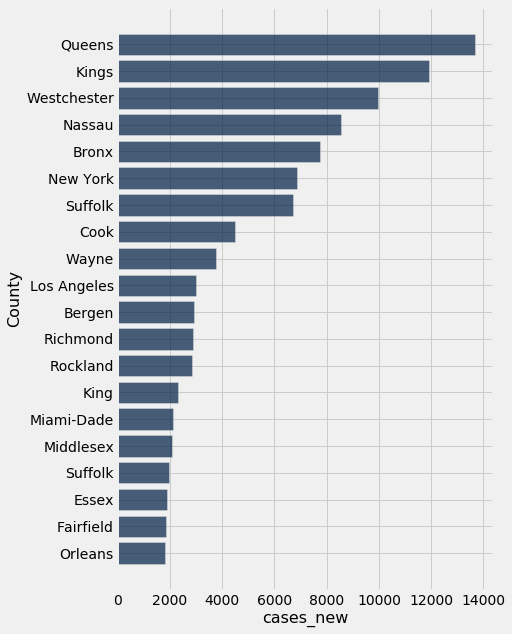

In [18]:
top_twenty.barh("County", "cases_new")

## Cases pers 100,000 people

In [19]:
covid_mar20 = covid_mar20.where(covid_mar20['Population'] > 0)
covid_mar20['cases_per100k'] = 100000 * covid_mar20['cases_new'] / covid_mar20['Population']

cases_per_sorted = covid_mar20.sort('cases_per100k', descending=True)
cases_per_sorted

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new,cases_per100k
36119,Westchester,New York,3/20,9967,9967,967506,10,10,1030.17
36087,Rockland,New York,3/20,2863,2863,325789,8,8,878.79
16013,Blaine,Idaho,3/20,192,192,23021,2,2,834.021
36059,Nassau,New York,3/20,8544,8544,1356924,48,48,629.659
36081,Queens,New York,3/20,13691,13691,2253858,660,660,607.447
36085,Richmond,New York,3/20,2889,2889,476143,113,113,606.75
36005,Bronx,New York,3/20,7766,7766,1418207,465,465,547.593
13095,Dougherty,Georgia,3/20,462,462,87956,18,18,525.263
22071,Orleans,Louisiana,3/20,1834,1834,390144,101,101,470.083
8051,Gunnison,Colorado,3/20,82,82,17462,1,1,469.591


<div class="alert alert-info">
<b>Question:</b> Let's look at the counties in California. First, return a table that only has the California counties. Then, select the counties from the table you want to compare to each other. 
   </div>

In [ ]:
ca_cases = covid_mar20.where("...", are.equal_to("..."))
ca_cases

In [21]:
#KEY
ca_cases = covid_mar20.where("State", "California")
ca_cases.show(10)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new,cases_per100k
6001,Alameda,California,3/20,313,313,1671329,7,7,18.7276
6003,Alpine,California,3/20,0,0,1129,0,0,0
6005,Amador,California,3/20,2,2,39752,0,0,5.03119
6007,Butte,California,3/20,8,8,219186,0,0,3.64987
6009,Calaveras,California,3/20,3,3,45905,0,0,6.53524
6011,Colusa,California,3/20,1,1,21547,0,0,4.64102
6013,Contra Costa,California,3/20,212,212,1153526,3,3,18.3784
6015,Del Norte,California,3/20,0,0,27812,0,0,0
6017,El Dorado,California,3/20,15,15,192843,0,0,7.77835
6019,Fresno,California,3/20,53,53,999101,0,0,5.30477


In [22]:
ca_cases.sort('cases_new', descending=True)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new,cases_per100k
6037,Los Angeles,California,3/20,3019,3018,10039107,54,54,30.0624
6085,Santa Clara,California,3/20,890,887,1927852,30,30,46.0098
6073,San Diego,California,3/20,603,601,3338330,7,7,18.003
6059,Orange,California,3/20,502,501,3175692,7,7,15.7761
6075,San Francisco,California,3/20,397,397,881549,6,6,45.0344
6065,Riverside,California,3/20,371,371,2470546,13,13,15.0169
6001,Alameda,California,3/20,313,313,1671329,7,7,18.7276
6081,San Mateo,California,3/20,309,309,766573,10,10,40.3093
6067,Sacramento,California,3/20,224,222,1552058,7,7,14.3036
6013,Contra Costa,California,3/20,212,212,1153526,3,3,18.3784


In [23]:
ca_cases.sort('cases_per100k', descending=True)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new,cases_per100k
6051,Mono,California,3/20,13,13,14444,0,0,90.0028
6085,Santa Clara,California,3/20,890,887,1927852,30,30,46.0098
6075,San Francisco,California,3/20,397,397,881549,6,6,45.0344
6027,Inyo,California,3/20,8,8,18039,0,0,44.3484
6081,San Mateo,California,3/20,309,309,766573,10,10,40.3093
6041,Marin,California,3/20,99,99,258826,4,4,38.2496
6037,Los Angeles,California,3/20,3019,3018,10039107,54,54,30.0624
6079,San Luis Obispo,California,3/20,80,80,283111,0,0,28.2575
6069,San Benito,California,3/20,17,15,62808,1,1,23.8823
6057,Nevada,California,3/20,21,21,99755,0,0,21.0516


In [24]:
select_counties = ["Los Angeles", "Alameda", "Orange", "San Bernardino", "Kern"]

#This will take the counties you choose for the comparison.
my_counties = ca_cases.where("County", are.contained_in(select_counties))
my_counties

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new,cases_per100k
6001,Alameda,California,3/20,313,313,1671329,7,7,18.7276
6029,Kern,California,3/20,83,83,900202,1,1,9.22015
6037,Los Angeles,California,3/20,3019,3018,10039107,54,54,30.0624
6059,Orange,California,3/20,502,501,3175692,7,7,15.7761
6071,San Bernardino,California,3/20,125,125,2180085,4,4,5.73372


<div class="alert alert-info">
<b>Question:</b> Now make another bar chart using your selected counties and the number of cases on May. First, filter out the data to contain information about May only.
   </div>


**Hint:** Use the number of the month.

In [ ]:
# Use this cell to make a bar chart of new cases in May 
...

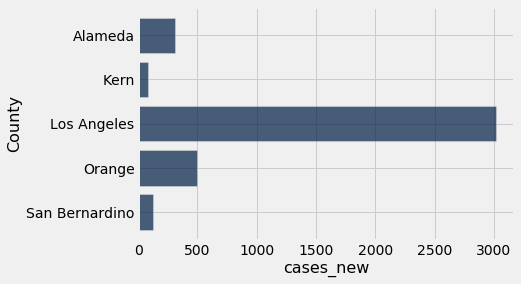

In [28]:
#KEY
my_counties.barh("County", "cases_new")

<div class="alert alert-info">
<b>Question:</b> What are some possible reasons for the disparities in certain counties? Hint: Think about the size of the counties.
   </div>

*Insert answer here.*

### Part 2

A disease will spread more when there are more people in a population to spread to. Let's look at the population of the states to compare the percentages based on the number of people. Here is a table with the states and their populations. 

In [73]:
#pop_by_state = Table().read_table("data/pop_by_state.csv")
#pop_by_state

State,Population
Alabama,4903185
Alaska,731545
American Samoa,55641
Arizona,7278717
Arkansas,3017804
California,39512223
Colorado,5758736
Connecticut,3565287
Delaware,973764
Diamond Princess,0


<div class="alert alert-info">
<b>Question:</b> First, group the covid statistics to show the number of cases for each state and the sum of the cases.
   </div>

In [29]:
#We are grouping all the counties into their states and taking the sum of the cases using this code.
grouped_by_state = covid_mar20.group("State", sum)
grouped_by_state

State,FIPS sum,County sum,Date sum,cases sum,cases_new sum,Population sum,fatalities sum,fatalities_new sum
Alabama,71489,,,1063,1063,4903185,15,15
Alaska,66469,,,129,129,740995,1,1
Arizona,60208,,,1289,1288,7278717,12,12
Arkansas,380625,,,489,489,3017804,5,5
California,351364,,,8233,8221,39512223,173,173
Colorado,515983,,,2837,2837,5758736,68,68
Connecticut,72064,,,3051,3051,3565287,67,67
Delaware,30009,,,319,319,973764,0,0
Diamond Princess,88888,,,49,49,0,0,0
District of Columbia,11001,,,495,495,705749,9,9


Notice the odd state, Diamond Princess. What is this state?
How many states do we have?

In [30]:
grouped_by_state.num_rows

53

In [56]:
#Now we will drop the County sum and Combined_Key sum because they 
#do not have numbers to add and we do not need the columns anymore.
grouped_by_state = grouped_by_state.drop(1, 2)
grouped_by_state

State,April sum,May sum,June sum
Alabama,1060,7294,18630
Alaska,132,364,466
American Samoa,0,0,0
Arizona,1413,7969,20129
Arkansas,584,3337,7443
California,9399,52026,114733
Colorado,3342,15793,26563
Connecticut,3557,28764,42740
Delaware,368,4918,9605
District of Columbia,586,4658,8857


<div class="alert alert-info">
<b>Question:</b> Now that we have it grouped by state, let's first look at the number of cases in June so we can compare it to the percentages we will look at later.
   </div>

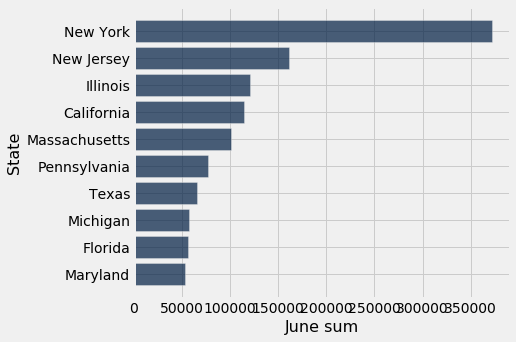

In [82]:
#Run this cell to see the number of
grouped_by_state.sort("June sum", descending = True).take(np.arange(10)).barh("State", "June sum")

<div class="alert alert-info">
<b>Question:</b> Now join this table with the pop_by_state table. 
   </div>

In [15]:
#We are going to join the two tables by providing the column they share which is "State".
with_pop = grouped_by_state.join("State", pop_by_state)
with_pop

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum,Population
Alabama,0,1060,7294,18630,4903185
Alaska,0,132,364,466,731545
American Samoa,0,0,0,0,55641
Arizona,1,1413,7969,20129,7278717
Arkansas,0,584,3337,7443,3017804
California,12,9399,52026,114733,39512223
Colorado,0,3342,15793,26563,5758736
Connecticut,0,3557,28764,42740,3565287
Delaware,0,368,4918,9605,973764
District of Columbia,0,586,4658,8857,705749


<div class="alert alert-info">
<b>Question:</b> Add a column called "Percentage" that has the number of cases collected in June divided by the population.
   </div>

In [34]:
#First, we want to find the columns that would make up an array of the percentages.
june_cases = with_pop.column("6/1/2020 sum")
population = ...
percentage = (.../...)*100
percentage

In [16]:
#KEY
june_cases = with_pop.column("6/1/2020 sum")
population = with_pop.column("Population")
percentage = (june_cases/population)*100
percentage

array([0.37995711, 0.0637008 , 0.        , 0.27654599, 0.2466363 ,
       0.29037344, 0.46126442, 1.19878147, 0.98637863, 1.25497875,
       0.26459957, 0.45116409, 0.10655852, 0.04604936, 0.15886384,
       0.95672122, 0.51736285, 0.62436016, 0.34050569, 0.22485979,
       0.86777345, 0.17474922, 0.88206786, 1.4625311 , 0.57607714,
       0.44697952, 0.52927458, 0.20711186, 0.04856013, 0.74157055,
       0.28251816, 0.34455851, 1.81169284, 0.37199028, 1.4208228 ,
       0.28214877, 0.34446016, 0.03989555, 0.30784235, 0.16611191,
       0.10199782, 0.59870384, 0.13203073, 1.41509835, 0.23594241,
       0.56903281, 0.33043528, 0.22621489, 0.31188805, 0.15753483,
       0.06525711, 0.53187158, 0.2886055 , 0.11316036, 0.31847506,
       0.15723298])

In [21]:
with_pct = with_pop.with_column("...", ...)
with_pct

In [17]:
#KEY
with_pct = with_pop.with_column("Percentage", percentage)
with_pct

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum,Population,Percentage
Alabama,0,1060,7294,18630,4903185,0.379957
Alaska,0,132,364,466,731545,0.0637008
American Samoa,0,0,0,0,55641,0
Arizona,1,1413,7969,20129,7278717,0.276546
Arkansas,0,584,3337,7443,3017804,0.246636
California,12,9399,52026,114733,39512223,0.290373
Colorado,0,3342,15793,26563,5758736,0.461264
Connecticut,0,3557,28764,42740,3565287,1.19878
Delaware,0,368,4918,9605,973764,0.986379
District of Columbia,0,586,4658,8857,705749,1.25498


<div class="alert alert-info">
<b>Question:</b> Like we did in the previous section, sort with_pct and include the top ten states with the most cases on June 1st. Then, create a bar chart to compare the states with the highest percentages of cases.
   </div>

In [38]:
top_ten_pct = ...

In [18]:
#KEY
top_ten_pct = with_pct.sort("Percentage", descending = True).take(np.arange(10))
top_ten_pct

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum,Population,Percentage
New Jersey,0,22255,121190,160918,8882190,1.81169
Massachusetts,1,7738,64311,100805,6892503,1.46253
New York,0,83948,308314,371711,26161672,1.42082
Rhode Island,1,566,8962,14991,1059361,1.4151
District of Columbia,0,586,4658,8857,705749,1.25498
Connecticut,0,3557,28764,42740,3565287,1.19878
Delaware,0,368,4918,9605,973764,0.986379
Illinois,3,6980,56055,121234,12671821,0.956721
Maryland,0,1986,23472,53327,6045680,0.882068
Louisiana,0,6424,28711,40341,4648794,0.867773


In [40]:
#fill in the code to make the bar chart looking at the States and their Percentages.
...

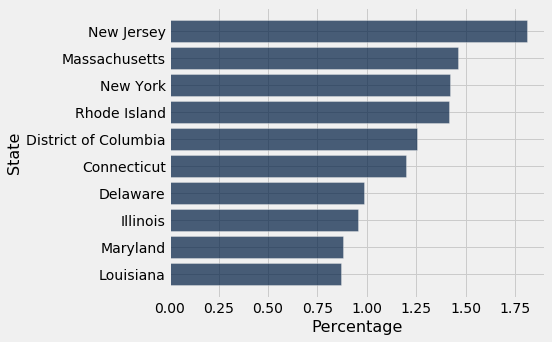

In [19]:
#KEY
top_ten_pct.barh("State", "Percentage")

<div class="alert alert-info">
<b>Question:</b> What differences do you see from the bar chart of the states when we just saw the number of cases? Give some possible reasons for the differences.
   </div>

*Insert answer here.*

# Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Now that we have some experience making these visualizations, let's go back to exponential growth. We know that, without intervention, a disease can behave like a rumor and spread at an alarming rate. From the previous section, we also know that we need to take into account the population of the region when looking at the number of cases.

Now we will read in two tables: Covid by State and Population by state in order to look at the percentage of the cases. And the growth of the 

In [60]:
covid_by_state = Table().read_table("data/covid_by_state.csv")
covid_by_state.show(5)

Days since 3/1/20,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,1,0,12,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,11,0,0,0
1,0,0,0,1,0,21,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,18,0,0,0
2,0,0,0,1,0,25,0,0,0,0,2,2,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,27,0,0,0
3,0,0,0,1,0,35,0,0,0,0,2,2,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,11,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,39,0,0,0
4,0,0,0,1,0,51,2,0,0,0,3,2,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,2,2,0,23,1,0,0,0,0,3,0,0,2,0,0,1,3,0,0,0,0,70,0,0,0


In [71]:
#run this cell to get a line plot!
def plot_states(state_1, state_2):
    covid_by_state.select(0, state_1, state_2).plot(0)
interact(plot_states, 
         state_1=Dropdown(options=covid_by_state.labels[1:]), 
         state_2=Dropdown(options=covid_by_state.labels[1:]));

interactive(children=(Dropdown(description='state_1', options=('Alabama', 'Alaska', 'American Samoa', 'Arizona…

Possible widget. Look at the growth of the cases and try to explain using your knowledge and other sources. Tell a story. (Presentation)

Tell us what you learned about the two states you chose.

Tell us something interesting about this data

Source: How Math (and Vaccines) Keep You Safe From the Flu by Patrick Honner (Quanta Magazine)
Notebook Authors: Alleanna Clark, Ashley Quiterio, Karla Palos Castellanos